<a href="https://colab.research.google.com/github/vkvachenok/admp/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.impute import KNNImputer

Task 1

In [ ]:
df = pd.read_csv('winequality-red_mod.csv')
df

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol,quality
0,NaN,0.00,1.9,11.0,0.99780,3.51,9.4,5
1,NaN,0.00,2.6,25.0,0.99680,3.20,9.8,5
2,NaN,0.04,2.3,NaN,0.99700,3.26,9.8,5
3,0.28,0.56,1.9,17.0,0.99800,3.16,9.8,6
4,0.70,0.00,1.9,11.0,0.99780,3.51,9.4,5
...,...,...,...,...,...,...,...,...
1594,0.60,0.08,2.0,NaN,0.99490,3.45,10.5,5
1595,0.55,0.10,2.2,NaN,0.99512,3.52,11.2,6
1596,0.51,0.13,2.3,29.0,0.99574,3.42,11.0,6
1597,NaN,0.12,2.0,32.0,0.99547,3.57,10.2,5


Task 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     768 non-null    float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   free sulfur dioxide  1040 non-null   float64
 4   density              1408 non-null   float64
 5   pH                   1312 non-null   float64
 6   alcohol              1599 non-null   float64
 7   quality              1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


In [ ]:
df.describe()

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol,quality
count,768.000000,1599.000000,1599.000000,1040.000000,1408.000000,1312.000000,1599.000000,1599.000000
mean,0.525189,0.270976,2.538806,16.023558,0.996772,3.311380,10.422983,5.636023
std,0.179779,0.194801,1.409928,10.566949,0.001890,0.152364,1.065668,0.807569
min,0.160000,0.000000,0.900000,1.000000,0.990070,2.740000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,8.000000,0.995600,3.210000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,14.000000,0.996800,3.310000,10.200000,6.000000
75%,0.630000,0.420000,2.600000,21.000000,0.997860,3.400000,11.100000,6.000000
max,1.580000,1.000000,15.500000,68.000000,1.003690,4.010000,14.900000,8.000000


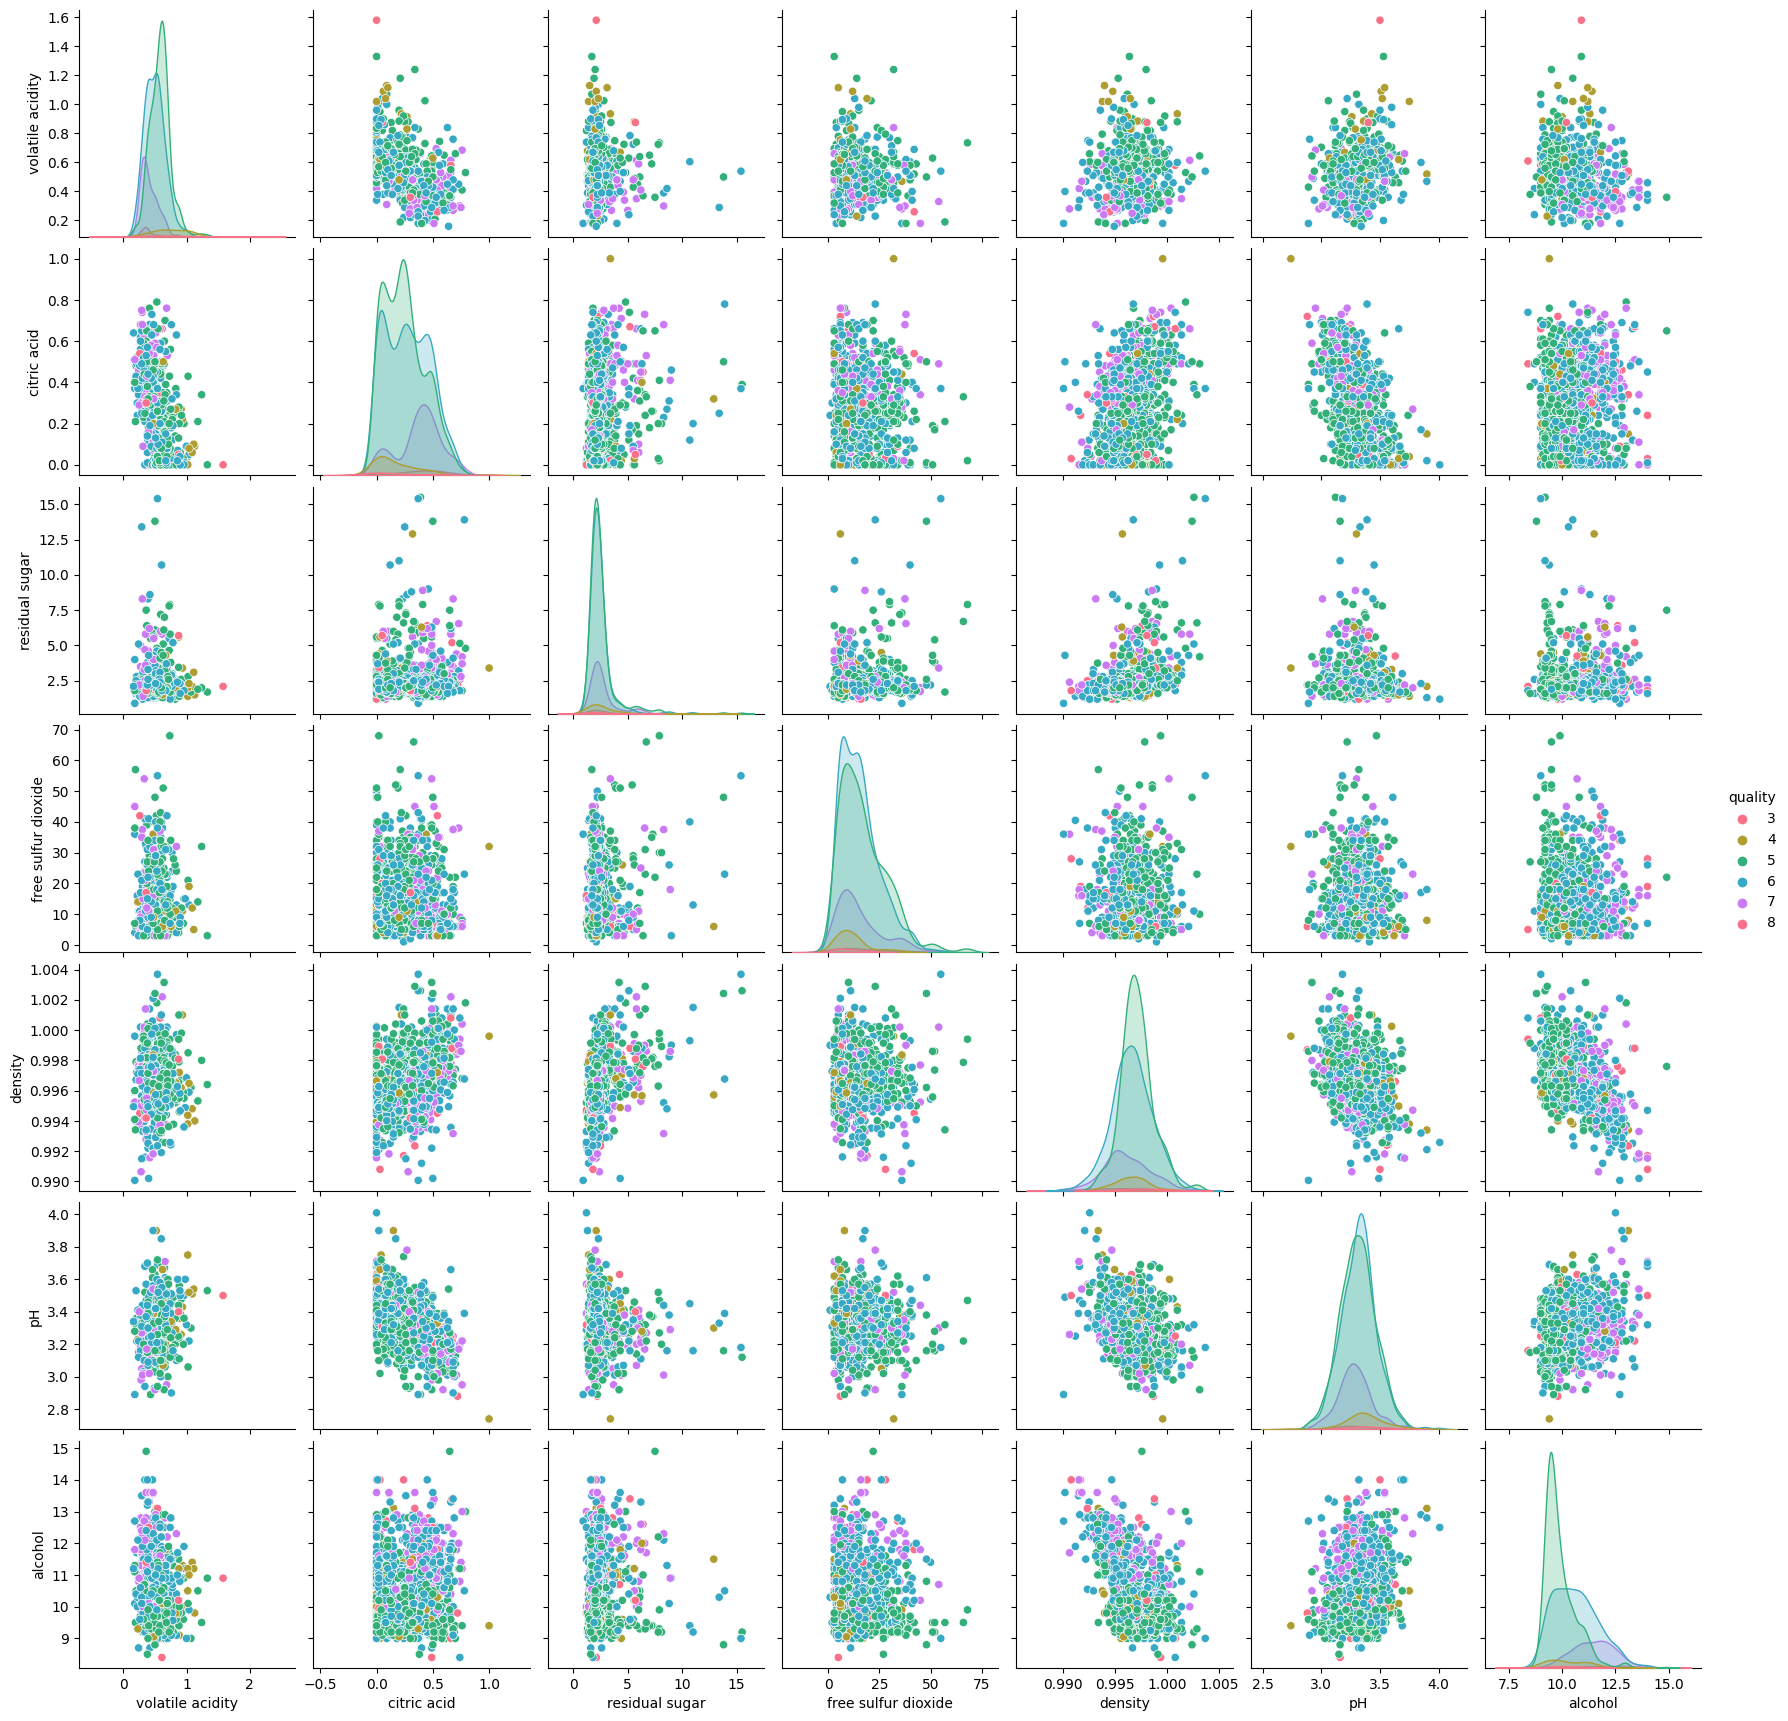

In [ ]:
sns.pairplot(df, palette="husl", hue='quality')

plt.show()

Task 4

In [ ]:
df_dropna_rows = df.dropna()

df_dropna_rows.info()
df_dropna_rows.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 3 to 1596
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     358 non-null    float64
 1   citric acid          358 non-null    float64
 2   residual sugar       358 non-null    float64
 3   free sulfur dioxide  358 non-null    float64
 4   density              358 non-null    float64
 5   pH                   358 non-null    float64
 6   alcohol              358 non-null    float64
 7   quality              358 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 25.2 KB


,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol,quality
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.522486,0.269358,2.511034,15.594972,0.996780,3.307737,10.431099,5.639665
std,0.171182,0.189146,1.347941,10.678163,0.002007,0.156805,1.117171,0.782363
min,0.180000,0.000000,0.900000,3.000000,0.990070,2.890000,8.400000,3.000000
25%,0.396250,0.100000,1.900000,7.000000,0.995585,3.210000,9.500000,5.000000
50%,0.515000,0.260000,2.200000,13.000000,0.996800,3.300000,10.100000,6.000000
75%,0.620000,0.420000,2.687500,21.000000,0.997947,3.390000,11.100000,6.000000
max,1.330000,0.680000,15.400000,68.000000,1.003690,3.900000,14.000000,8.000000


Task 5

In [ ]:
df_dropna_cols_rows = df.dropna(axis=1, thresh=int(0.25 * len(df)))\
                      .dropna()

Task 6

In [ ]:
df_dropna_cols_rows.info()
df_dropna_cols_rows.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 3 to 1596
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     358 non-null    float64
 1   citric acid          358 non-null    float64
 2   residual sugar       358 non-null    float64
 3   free sulfur dioxide  358 non-null    float64
 4   density              358 non-null    float64
 5   pH                   358 non-null    float64
 6   alcohol              358 non-null    float64
 7   quality              358 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 25.2 KB


,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol,quality
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.522486,0.269358,2.511034,15.594972,0.996780,3.307737,10.431099,5.639665
std,0.171182,0.189146,1.347941,10.678163,0.002007,0.156805,1.117171,0.782363
min,0.180000,0.000000,0.900000,3.000000,0.990070,2.890000,8.400000,3.000000
25%,0.396250,0.100000,1.900000,7.000000,0.995585,3.210000,9.500000,5.000000
50%,0.515000,0.260000,2.200000,13.000000,0.996800,3.300000,10.100000,6.000000
75%,0.620000,0.420000,2.687500,21.000000,0.997947,3.390000,11.100000,6.000000
max,1.330000,0.680000,15.400000,68.000000,1.003690,3.900000,14.000000,8.000000


Task 7

In [ ]:
df_simple_imp = df.copy()
df_simple_imp['volatile acidity'].fillna(inplace = True, value=df_simple_imp['volatile acidity'].median())

Task 8

In [ ]:
df_simple_imp.fillna(value=df_simple_imp.mean(), inplace=True)
df_simple_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   free sulfur dioxide  1599 non-null   float64
 4   density              1599 non-null   float64
 5   pH                   1599 non-null   float64
 6   alcohol              1599 non-null   float64
 7   quality              1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


In [ ]:
df_simple_imp.describe()

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.522492,0.270976,2.538806,16.023558,0.996772,3.311380,10.422983,5.636023
std,0.124579,0.194801,1.409928,8.520577,0.001774,0.138005,1.065668,0.807569
min,0.160000,0.000000,0.900000,1.000000,0.990070,2.740000,8.400000,3.000000
25%,0.520000,0.090000,1.900000,11.000000,0.995800,3.240000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,16.023558,0.996772,3.311380,10.200000,6.000000
75%,0.520000,0.420000,2.600000,16.023558,0.997645,3.380000,11.100000,6.000000
max,1.580000,1.000000,15.500000,68.000000,1.003690,4.010000,14.900000,8.000000


In [ ]:
df_simple_imp.mean()

volatile acidity        0.522492
citric acid             0.270976
residual sugar          2.538806
free sulfur dioxide    16.023558
density                 0.996772
pH                      3.311380
alcohol                10.422983
quality                 5.636023
dtype: float64

Task 9

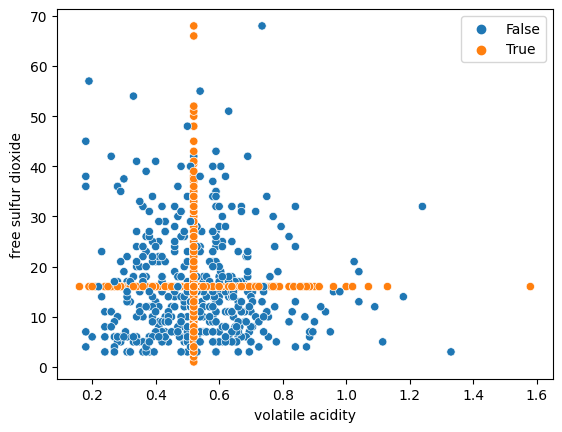

In [ ]:
nan_mask = df[['volatile acidity', 'free sulfur dioxide']].isna().any(axis=1)
sns.scatterplot(df_simple_imp, x = 'volatile acidity', y = 'free sulfur dioxide', hue=nan_mask);

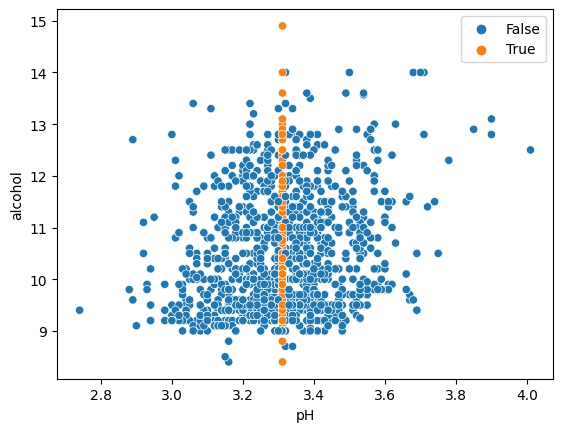

In [ ]:
nan_mask = df[['pH', 'alcohol']].isna().any(axis=1)
sns.scatterplot(df_simple_imp, x = 'pH', y = 'alcohol', hue=nan_mask);

Task 10

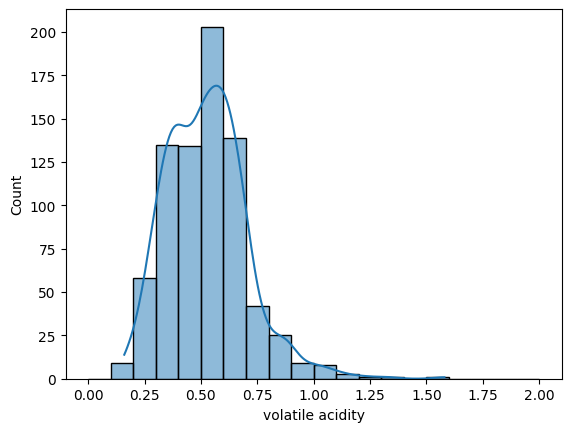

In [ ]:
sns.histplot(data=df, x='volatile acidity', kde=True, binwidth=0.1, binrange=(0, 2))

plt.show()

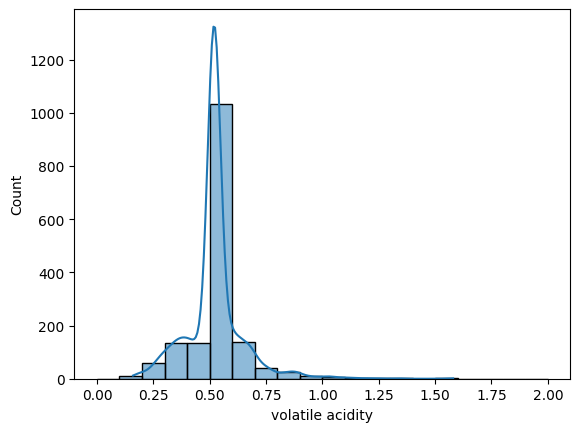

In [ ]:
sns.histplot(data=df_simple_imp, x='volatile acidity', kde=True, binwidth=0.1, binrange=(0, 2))

plt.show()

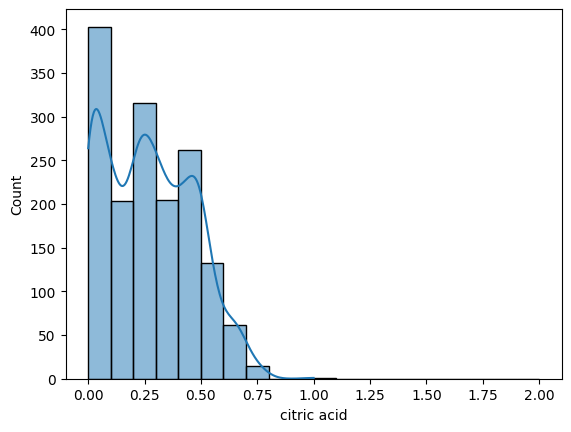

In [ ]:

sns.histplot(data=df, x='citric acid', kde=True, binwidth=0.1, binrange=(0, 2))

plt.show()

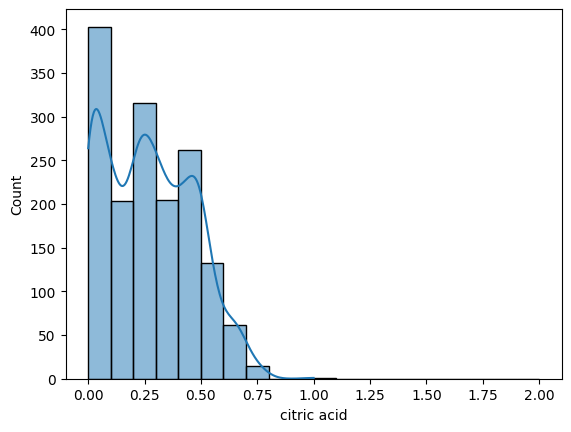

In [ ]:
sns.histplot(data=df_simple_imp, x='citric acid', kde=True, binwidth=0.1, binrange=(0, 2))

plt.show()

Task 11

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("quality", axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
X_scaled_df.describe()

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol
count,7.680000e+02,1.599000e+03,1.599000e+03,1.040000e+03,1.408000e+03,1.312000e+03,1.599000e+03
mean,-3.978299e-16,-8.887339e-17,-1.244227e-16,1.639714e-16,-2.664535e-14,1.992986e-15,1.066481e-16
std,1.000652e+00,1.000313e+00,1.000313e+00,1.000481e+00,1.000355e+00,1.000381e+00,1.000313e+00
min,-2.032639e+00,-1.391472e+00,-1.162696e+00,-1.422434e+00,-3.546792e+00,-3.751525e+00,-1.898919e+00
25%,-7.524602e-01,-9.293181e-01,-4.532184e-01,-7.596722e-01,-6.202060e-01,-6.656310e-01,-8.663789e-01
50%,-2.888085e-02,-5.636026e-02,-2.403750e-01,-1.915909e-01,1.485800e-02,-9.057907e-03,-2.093081e-01
75%,5.833786e-01,7.652471e-01,4.341614e-02,4.711707e-01,5.758312e-01,5.818579e-01,6.354971e-01
max,5.871074e+00,3.743574e+00,9.195681e+00,4.921141e+00,3.661184e+00,4.586954e+00,4.202453e+00


Task 12

In [ ]:
imputer = KNNImputer(n_neighbors=3)

X_scaled_imp = imputer.fit_transform(X_scaled)

Task 13

In [ ]:
X_imp = scaler.inverse_transform(X_scaled_imp)

Task 14

In [ ]:
df_kNN_imp = df.copy()

imputer = KNNImputer(n_neighbors=3)
X_scaled_imp = imputer.fit_transform(X_scaled)

X_imp = scaler.inverse_transform(X_scaled_imp)

df_kNN_imp.iloc[:, :-1] = X_imp

df_kNN_imp.info()
df_kNN_imp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   free sulfur dioxide  1599 non-null   float64
 4   density              1599 non-null   float64
 5   pH                   1599 non-null   float64
 6   alcohol              1599 non-null   float64
 7   quality              1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.526183,0.270976,2.538806,16.078278,0.996757,3.313379,10.422983,5.636023
std,0.162788,0.194801,1.409928,9.486802,0.001859,0.147159,1.065668,0.807569
min,0.160000,0.000000,0.900000,1.000000,0.990070,2.740000,8.400000,3.000000
25%,0.400000,0.090000,1.900000,9.000000,0.995600,3.220000,9.500000,5.000000
50%,0.521667,0.260000,2.200000,14.333333,0.996800,3.310000,10.200000,6.000000
75%,0.630000,0.420000,2.600000,21.000000,0.997810,3.400000,11.100000,6.000000
max,1.580000,1.000000,15.500000,68.000000,1.003690,4.010000,14.900000,8.000000


Task 15

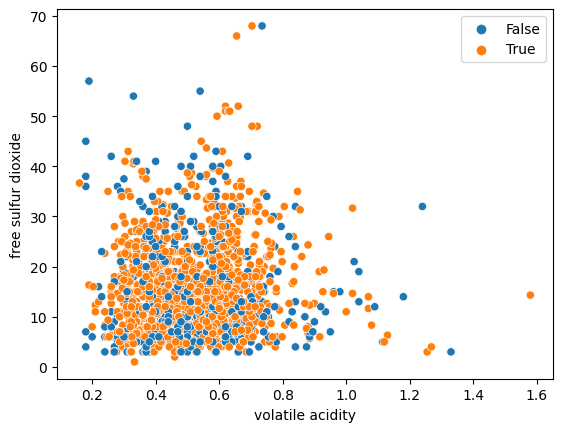

In [ ]:
nan_mask = df[['volatile acidity', 'free sulfur dioxide']].isna().any(axis=1)
sns.scatterplot(df_kNN_imp, x = 'volatile acidity', y = 'free sulfur dioxide', hue=nan_mask);

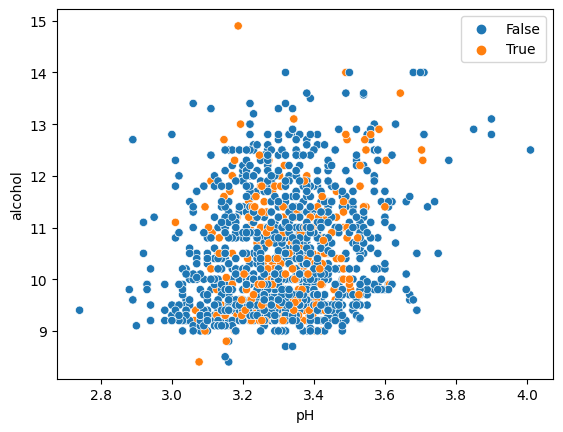

In [ ]:
nan_mask = df[['pH', 'alcohol']].isna().any(axis=1)
sns.scatterplot(df_kNN_imp, x = 'pH', y = 'alcohol', hue=nan_mask);